<a href="https://colab.research.google.com/github/plopezmp/AmI/blob/main/AmI_XNOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


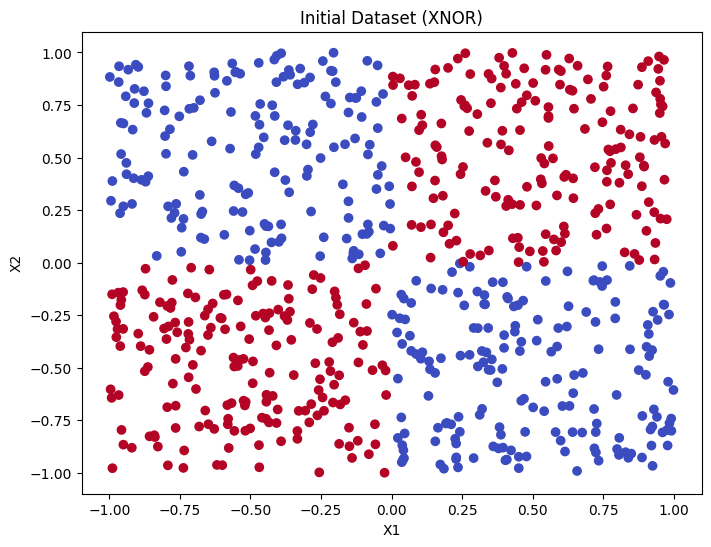

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


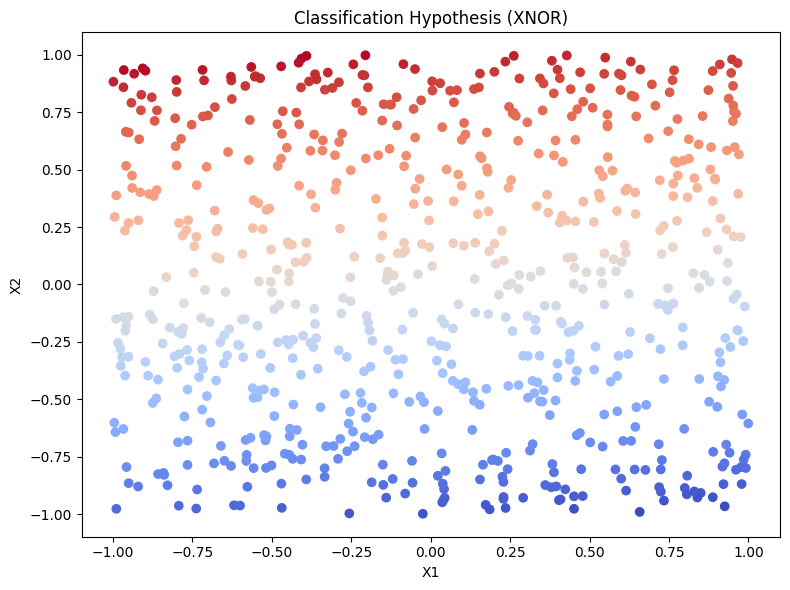

In [12]:
def generate_xnor_data(n_samples=700):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 2 - 1  # Random points in [-1, 1] interval
    #print(X)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR function
    #print(y)
    return X, np.logical_not(y).astype(int)  # Invert labels for XNOR

# Generate XNOR data
X, y = generate_xnor_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
plt.title('Initial Dataset (XNOR)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Define neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=16)

# Plot hypothesis
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X)[:, 0], cmap='coolwarm', marker='o')
plt.title('Classification Hypothesis (XNOR)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()


#### En el código del clasificador de datos XNOR podemos realizar experimentos:

1.   Subir el número de neuronas
2.   Cambiar de lineal a ReLU
3.   Poner una *capa* adicional a la red neuronal
